# Import libraries for data manipulation


In [1]:
import numpy as np
import pandas as pd



# Import libraries for data visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# Import libraries for ML-scikit-learn


In [3]:
import sklearn.model_selection as sms
import sklearn.tree as ste
import sklearn.metrics as smt


In [4]:
# Import libraries for statistics
import scipy.stats as stt


In [5]:
df = pd.read_csv("alllife_customer.csv")


In [6]:
df


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [7]:
df.head((5))


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
# Display the summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
df = pd.get_dummies(df, drop_first=True)


In [11]:
# Splitting data
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [12]:
X = df.drop("Personal_Loan", axis=1)  # Target variable: 'Personal_Loan'
y = df["Personal_Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.ensemble import RandomForestClassifier
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score  # Import first

# Assuming you have already trained a model
y_pred = model.predict(X_test)  # Generate predictions

# Now, compute accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.989


In [17]:
#Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", smt.accuracy_score(y_test, y_pred))
print("Classification Report:\n", smt.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", smt.confusion_matrix(y_test, y_pred))



Accuracy: 0.989
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
 [[893   2]
 [  9  96]]


In [18]:
from collections import Counter

# Statistical Analysis - Fixing Chi-Square Issue
# Count class occurrences
y_test_counts = Counter(y_test)
y_pred_counts = Counter(y_pred)
# Convert to proper frequency format
observed = np.array([y_test_counts[0], y_test_counts[1]])
expected = np.array([y_pred_counts[0], y_pred_counts[1]])

# Perform Chi-Square test
chi2_stat, p_val = stt.chisquare(f_obs=observed, f_exp=expected)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_val)


Chi-Square Statistic: 0.5543237250554324
P-Value: 0.4565563844206484


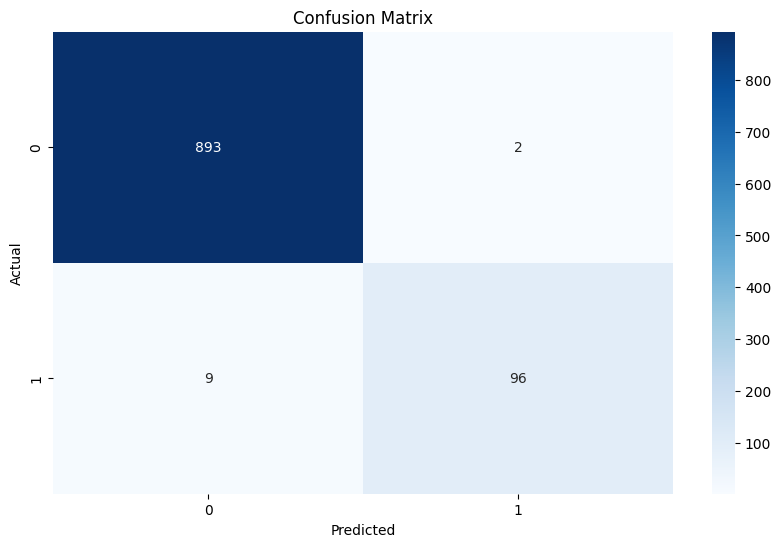

In [19]:
# Data Visualization
plt.figure(figsize=(10,6))
sns.heatmap(smt.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

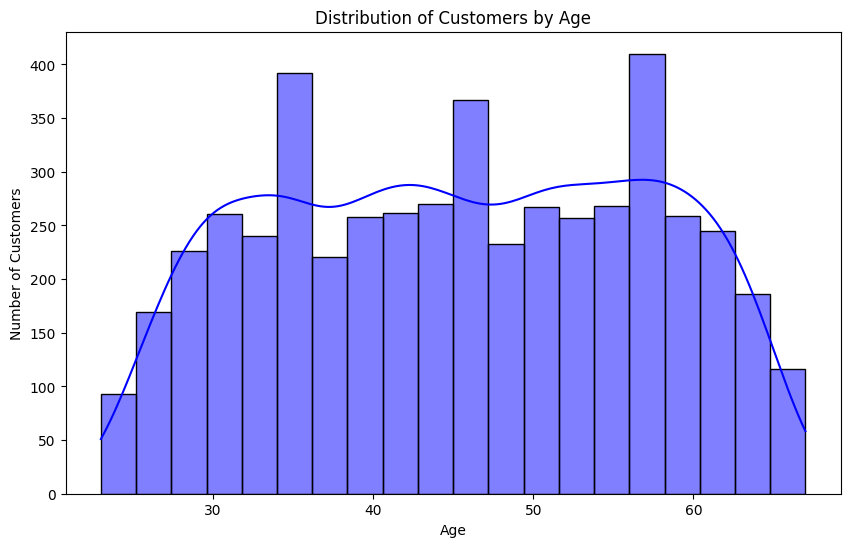

In [20]:
#Distribution of Customers by Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers by Age")
plt.show()


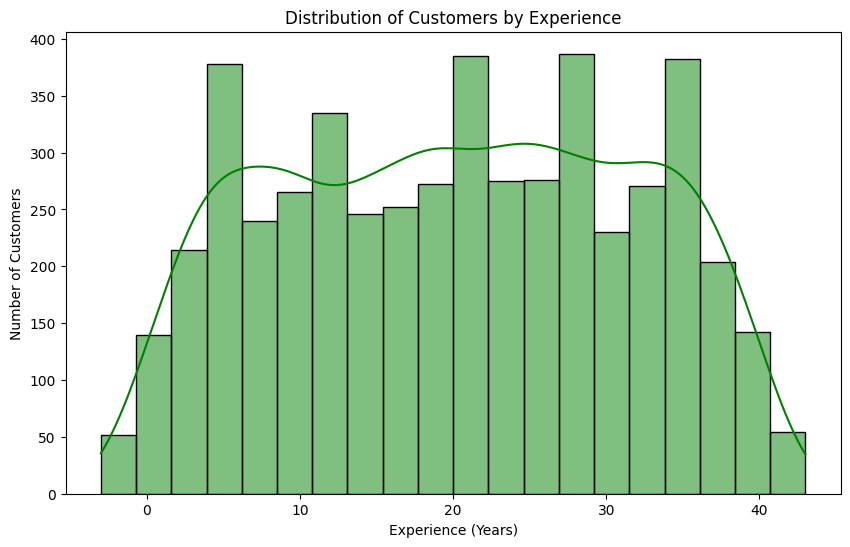

In [21]:
# Distribution of Customers by Experience
plt.figure(figsize=(10,6))
sns.histplot(df['Experience'], bins=20, kde=True, color='green')
plt.xlabel("Experience (Years)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers by Experience")
plt.show()


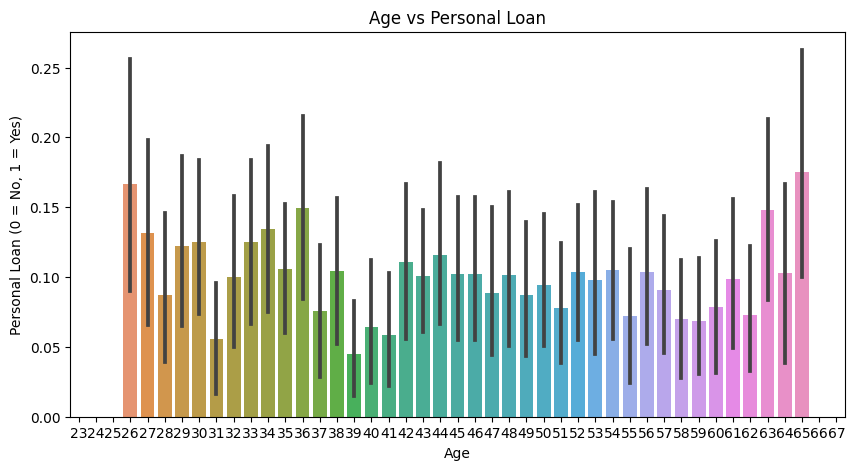

In [22]:
# Impact of Age on Personal Loan Approval
plt.figure(figsize=(10,5))
sns.barplot(x=df["Age"], y=df["Personal_Loan"])
plt.title("Age vs Personal Loan")
plt.xlabel("Age")
plt.ylabel("Personal Loan (0 = No, 1 = Yes)")
plt.show()



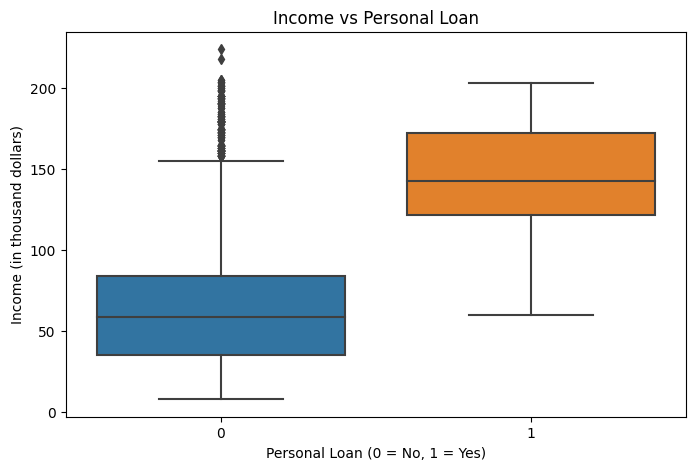

In [23]:
# Income Distribution Among Customers Based on Personal Loan Approval
plt.figure(figsize=(8,5))
sns.boxplot(x="Personal_Loan", y="Income", data=df)
plt.title("Income vs Personal Loan")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Income (in thousand dollars)")
plt.show()


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  This is separate from the ipykernel package so we can avoid doing imports until


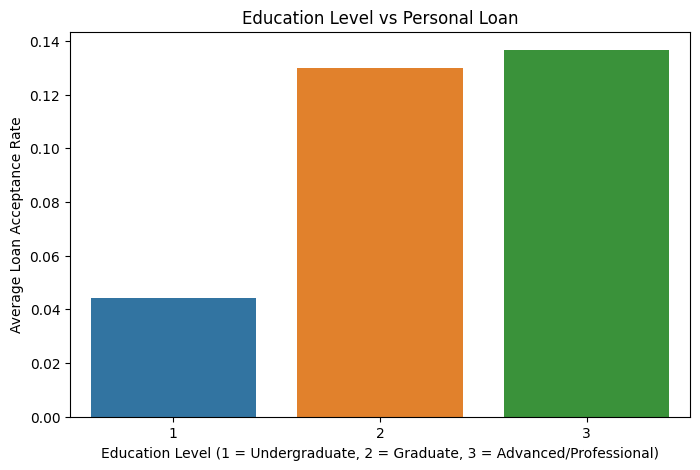

In [24]:
# Effect of Education Level on Personal Loan Approval
plt.figure(figsize=(8,5))
sns.barplot(x="Education", y="Personal_Loan", data=df, ci=None)
plt.title("Education Level vs Personal Loan")
plt.xlabel("Education Level (1 = Undergraduate, 2 = Graduate, 3 = Advanced/Professional)")
plt.ylabel("Average Loan Acceptance Rate")
plt.show()


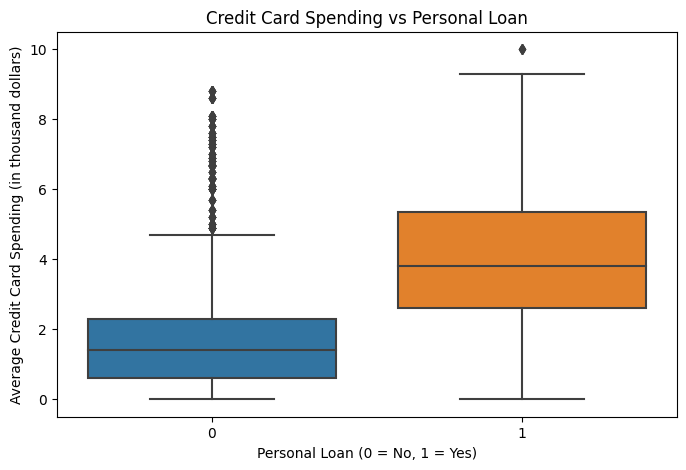

In [25]:
# Credit Card Spending Pattern Based on Personal Loan Approval
plt.figure(figsize=(8,5))
sns.boxplot(x="Personal_Loan", y="CCAvg", data=df)
plt.title("Credit Card Spending vs Personal Loan")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Average Credit Card Spending (in thousand dollars)")
plt.show()


<Figure size 1000x500 with 0 Axes>

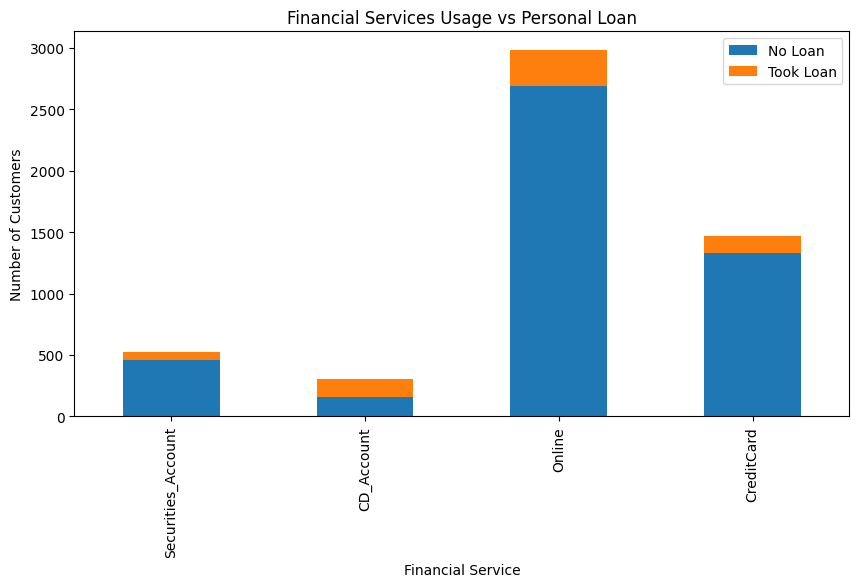

In [26]:
# Usage of Financial Services Among Loan and Non-Loan Customers
plt.figure(figsize=(10,5))
financial_features = ["Securities_Account", "CD_Account", "Online", "CreditCard"]
df_grouped = df.groupby("Personal_Loan")[financial_features].sum()

df_grouped.T.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Financial Services Usage vs Personal Loan")
plt.xlabel("Financial Service")
plt.ylabel("Number of Customers")
plt.legend(["No Loan", "Took Loan"])
plt.show()


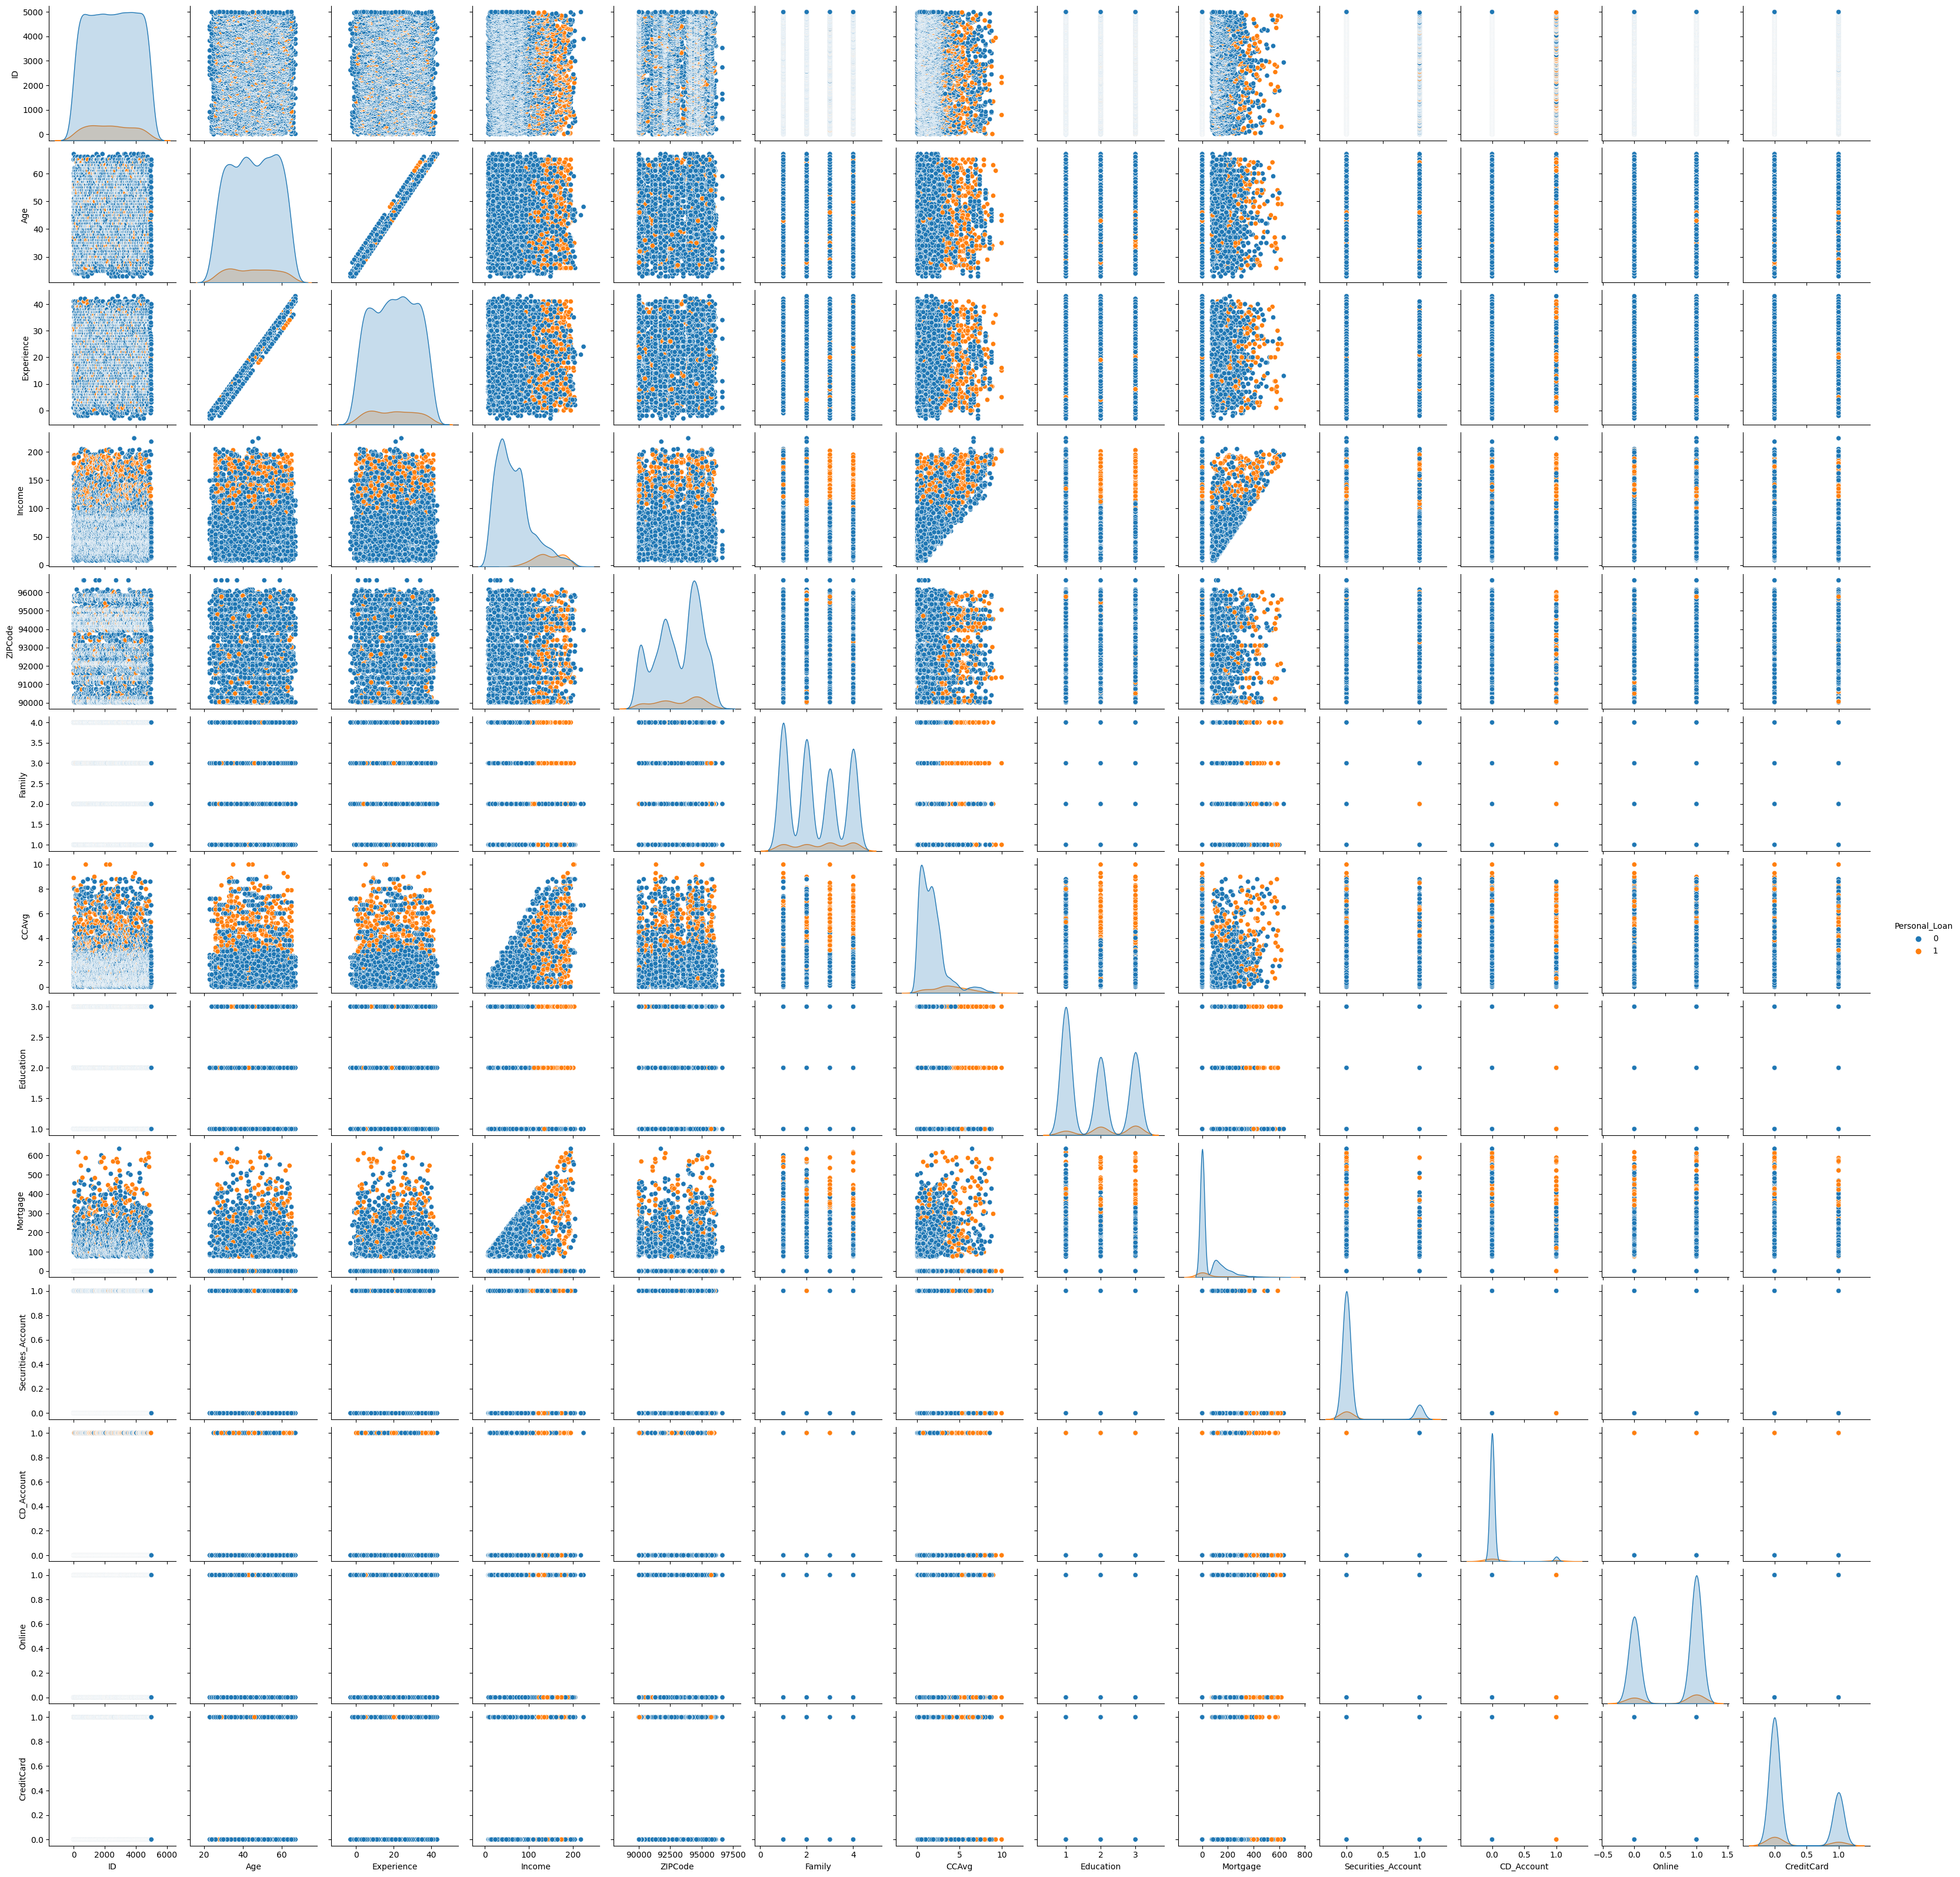

In [27]:
# Exploring Feature Relationships Based on Personal Loan Status
sns.pairplot(df, hue="Personal_Loan", diag_kind="kde")
plt.show()


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Model Training and Evaluation
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Decision Tree
train_and_evaluate(ste.DecisionTreeClassifier(random_state=42), "Decision Tree")

# Random Forest
train_and_evaluate(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")

# Logistic Regression
train_and_evaluate(LogisticRegression(), "Logistic Regression")

# Support Vector Machine (SVM)
train_and_evaluate(SVC(), "Support Vector Machine")

# Neural Network (MLP Classifier)
train_and_evaluate(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42), "Neural Network")


Decision Tree Accuracy: 0.985
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.94      0.91      0.93       105

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000

Decision Tree Confusion Matrix:
 [[889   6]
 [  9  96]]
--------------------------------------------------
Random Forest Accuracy: 0.989
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Random Forest Confusion Matrix:
 [[893   2]
 [  9  96]]
-----------------------------------------------